# Importing necessary libraries

In [20]:
from collections import Counter
from zipfile import ZipFile
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt 

from xgboost import XGBClassifier
import numpy as np

# Preparing data

In [21]:
zip_file = ZipFile('../../data/out/clean.zip')
df_clean = pd.read_csv(zip_file.open('clean.csv'))

df_clean.head()

,is_app_approved,bad,annual_income,all0000,all0060,all0061,all0101,all0200,all0201,all0206,...,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY
0,1,0.0,15171,10.0,8.000000,8.000000,0.0,9.0,0.0,1.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.0,20000,3.0,4.165954,5.237061,0.0,3.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.0,7000,6.0,4.165954,5.237061,0.0,4.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,1,1.0,18000,3.0,1.000000,1.000000,0.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.0,30000,6.0,4.165954,5.237061,0.0,2.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0


## Oversampling

In [22]:
# oversample = SMOTE()
X = df_clean.drop(columns='bad')
y = df_clean.bad.astype(int)
# counter = Counter(y)
# print(counter)

# X,y = oversample.fit_resample(X,y)
# counter = Counter(y)
# print(counter)

## Standard Scale the data

In [23]:
scaler = StandardScaler()
scaler.fit(X)
scaled_data = pd.DataFrame(scaler.transform(X), columns = X.columns)
X = scaled_data

Splitting the dataset into train/test

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Oversampling on training

In [26]:
oversample = SMOTE()
counter = Counter(y_train)
print(counter)

X_train,y_train = oversample.fit_resample(X_train,y_train)
counter = Counter(y_train)
print(counter)

Counter({0: 27212, 1: 27212})
Counter({0: 27212, 1: 27212})


# Models

In [27]:
zip_file = ZipFile('../../data/out/clean_holdout.zip')
holdout = pd.read_csv(zip_file.open('clean_holdout.csv'))


X_holdout = holdout.drop(columns='bad')
y_holdout = holdout.bad.astype(int)

scaler = StandardScaler()
scaler.fit(X_holdout)
X_holdout = pd.DataFrame(scaler.transform(X_holdout), columns = X_holdout.columns)

In [28]:
display(X_holdout), y_holdout

,is_app_approved,annual_income,all0000,all0060,all0061,all0101,all0200,all0201,all0206,all0217,...,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY
0,0.0,-0.025706,-0.967176,-0.493571,-0.593885,-0.098264,-0.939672,-0.030152,-0.219499,-0.972130,...,-0.044578,-0.131803,-0.266252,-0.082276,-0.152359,-0.046707,-0.151191,-0.132277,-0.087198,-0.034092
1,0.0,-0.026905,-0.967176,-0.493571,-0.593885,-0.098264,-0.939672,-0.030152,-0.219499,-0.972130,...,-0.044578,-0.131803,-0.266252,-0.082276,-0.152359,-0.046707,-0.151191,-0.132277,-0.087198,-0.034092
2,0.0,-0.023137,-0.800244,-0.493571,-0.593885,-0.098264,-0.762977,-0.030152,-0.219499,-0.722534,...,-0.044578,-0.131803,-0.266252,-0.082276,-0.152359,-0.046707,6.614133,-0.132277,-0.087198,-0.034092
3,0.0,-0.026905,-0.800244,-0.493571,-0.593885,-0.098264,-0.762977,-0.030152,-0.219499,-0.722534,...,-0.044578,-0.131803,-0.266252,-0.082276,-0.152359,-0.046707,-0.151191,-0.132277,-0.087198,-0.034092
4,0.0,-0.025419,-0.800244,-0.493571,-0.593885,-0.098264,-0.762977,-0.030152,-0.219499,-0.972130,...,-0.044578,-0.131803,-0.266252,-0.082276,-0.152359,-0.046707,-0.151191,-0.132277,-0.087198,-0.034092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41341,0.0,-0.023070,-0.716778,0.552872,0.636392,-0.098264,-0.674630,-0.030152,-0.219499,-0.597736,...,-0.044578,-0.131803,-0.266252,-0.082276,-0.152359,-0.046707,-0.151191,-0.132277,-0.087198,-0.034092
41342,0.0,-0.010130,-0.883710,-1.096282,-1.454240,-0.098264,-0.851325,-0.030152,-0.219499,-0.972130,...,22.432555,-0.131803,-0.266252,-0.082276,-0.152359,-0.046707,-0.151191,-0.132277,-0.087198,-0.034092
41343,0.0,-0.006535,1.536808,0.061020,-0.239112,-0.098264,1.710752,-0.030152,-0.219499,0.775042,...,-0.044578,-0.131803,3.755838,-0.082276,-0.152359,-0.046707,-0.151191,-0.132277,-0.087198,-0.034092
41344,0.0,-0.007014,4.374656,-0.131863,-0.441633,-0.098264,4.361177,-0.030152,3.021139,5.018173,...,-0.044578,-0.131803,-0.266252,-0.082276,-0.152359,-0.046707,-0.151191,-0.132277,-0.087198,-0.034092


(None,
 0        0
 1        0
 2        0
 3        1
 4        0
         ..
 41341    0
 41342    0
 41343    0
 41344    0
 41345    0
 Name: bad, Length: 41346, dtype: int64)

In [29]:
display(X_train), y_train

,is_app_approved,annual_income,all0000,all0060,all0061,all0101,all0200,all0201,all0206,all0217,...,state_code_SD,state_code_TN,state_code_TX,state_code_UT,state_code_VA,state_code_VT,state_code_WA,state_code_WI,state_code_WV,state_code_WY
0,0.0,0.018746,0.123782,-0.709330,-1.046295,-0.104305,0.213968,-0.029356,1.408012,0.157246,...,-0.046297,-0.137546,-0.263125,-0.080804,-0.154106,-0.0545,-0.152258,-0.132585,-0.086226,-0.036626
1,0.0,-0.023046,-0.460695,-0.175099,-0.195648,-0.104305,-0.404999,-0.029356,-0.216488,-0.343698,...,-0.046297,-0.137546,-0.263125,-0.080804,-0.154106,-0.0545,-0.152258,-0.132585,-0.086226,-0.036626
2,0.0,-0.019875,-0.293702,0.139451,0.164537,-0.104305,-0.228152,-0.029356,-0.216488,-0.218462,...,-0.046297,-0.137546,-0.263125,-0.080804,-0.154106,-0.0545,-0.152258,-0.132585,-0.086226,-0.036626
3,0.0,-0.018723,-0.544192,-0.321208,0.164537,-0.104305,-0.493423,-0.029356,-0.216488,-0.468934,...,-0.046297,-0.137546,-0.263125,-0.080804,-0.154106,-0.0545,-0.152258,-0.132585,-0.086226,-0.036626
4,0.0,-0.015982,3.714143,5.306561,5.282604,-0.104305,2.689836,-0.029356,-0.216488,2.912440,...,-0.046297,-0.137546,-0.263125,-0.080804,6.489021,-0.0545,-0.152258,-0.132585,-0.086226,-0.036626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54419,0.0,-0.022584,-0.670647,-0.224939,-0.259401,-0.104305,-0.627340,-0.029356,-0.216488,-0.678871,...,-0.046297,-0.137546,0.394515,-0.080804,-0.154106,-0.0545,-0.152258,-0.132585,-0.086226,-0.036626
54420,0.0,-0.020881,-0.753828,-0.618385,-0.195648,-0.104305,-0.715430,-0.029356,-0.216488,-0.762045,...,-0.046297,-0.137546,-0.263125,-0.080804,-0.154106,-0.0545,-0.152258,-0.132585,-0.086226,-0.036626
54421,0.0,-0.021605,-0.139769,-0.175099,-0.195648,-0.104305,-0.065135,-0.029356,-0.216488,0.084834,...,-0.046297,-0.137546,-0.263125,-0.080804,-0.154106,-0.0545,-0.152258,-0.132585,-0.086226,-0.036626
54422,0.0,-0.017767,-0.372702,0.078352,-0.167501,-0.104305,-0.311813,-0.029356,1.151843,-0.402944,...,-0.046297,-0.137546,-0.263125,-0.080804,-0.154106,-0.0545,-0.152258,-0.132585,-0.086226,-0.036626


(None,
 0        0
 1        0
 2        0
 3        0
 4        0
         ..
 54419    1
 54420    1
 54421    1
 54422    1
 54423    1
 Name: bad, Length: 54424, dtype: int64)

## Logistic Regression

In [30]:
logit = LogisticRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_holdout)

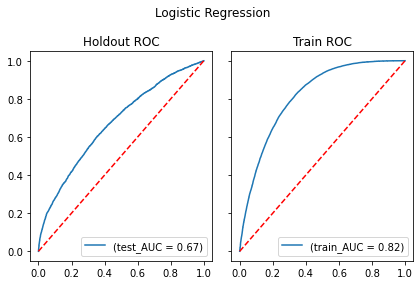

<Figure size 432x288 with 0 Axes>

In [42]:
fig, axes = plt.subplots(1, 2, sharey=True)

logit_roc_auc = roc_auc_score(y_holdout, logit.predict_proba(X_holdout)[:, 1])
fpr, tpr, thresholds = roc_curve(y_holdout, logit.predict_proba(X_holdout)[:,1])

axes[0].plot(fpr, tpr, label='(test_AUC = %0.2f)' % logit_roc_auc)
axes[0].plot([0, 1], [0, 1],'r--')

axes[0].title.set_text('Holdout ROC')
axes[0].legend(loc="lower right")


logit_roc_auc = roc_auc_score(y_train, logit.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, logit.predict_proba(X_train)[:,1])
plt.figure()
axes[1].plot(fpr, tpr, label='(train_AUC = %0.2f)' % logit_roc_auc)
axes[1].plot([0, 1], [0, 1],'r--')

axes[1].title.set_text('Train ROC')
axes[1].legend(loc="lower right")
fig.suptitle('Logistic Regression')
fig.tight_layout()

plt.show()

## XGBoost

In [32]:
xgboost = XGBClassifier()
xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_holdout)



[16:25:45] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [33]:
# params = {
#         'min_child_weight': [1, 5, 10],
#         'gamma': [0.5, 1, 1.5, 2, 5],
#         'subsample': [0.6, 0.8, 1.0],
#         'colsample_bytree': [0.6, 0.8, 1.0],
#         'max_depth': [3, 4, 5]
#         }

# xgboost = XGBClassifier()

# clf = GridSearchCV(xgboost, params, scoring='roc_auc', n_jobs=-1)
# clf.fit(X_train, y_train)
# y_pred = clf.predict(X_test)

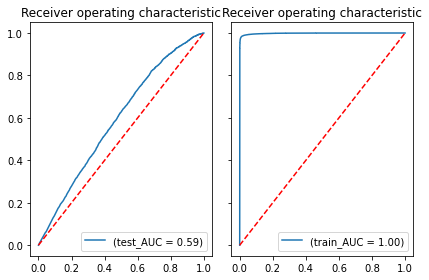

<Figure size 432x288 with 0 Axes>

In [34]:
fig, axes = plt.subplots(1, 2, sharey=True)

logit_roc_auc = roc_auc_score(y_holdout, xgboost.predict_proba(X_holdout)[:, 1])
fpr, tpr, thresholds = roc_curve(y_holdout, xgboost.predict_proba(X_holdout)[:,1])

axes[0].plot(fpr, tpr, label='(test_AUC = %0.2f)' % logit_roc_auc)
axes[0].plot([0, 1], [0, 1],'r--')

axes[0].title.set_text('Holdout ROC')
axes[0].legend(loc="lower right")


logit_roc_auc = roc_auc_score(y_train, xgboost.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, xgboost.predict_proba(X_train)[:,1])
plt.figure()
axes[1].plot(fpr, tpr, label='(train_AUC = %0.2f)' % logit_roc_auc)
axes[1].plot([0, 1], [0, 1],'r--')

axes[1].title.set_text('Train ROC')
axes[1].legend(loc="lower right")
fig.suptitle('XGBoost')
fig.tight_layout()

plt.show()

## Random Forest

In [35]:
rdnfst = RandomForestClassifier(max_depth=15, min_samples_leaf=1, min_samples_split=2, n_estimators=200, n_jobs=-1)
rdnfst.fit(X, y)

y_pred = rdnfst.predict(X_holdout)
# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))

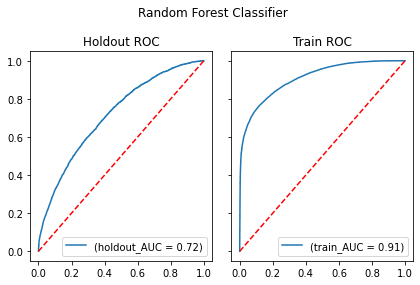

<Figure size 432x288 with 0 Axes>

In [43]:
fig, axes = plt.subplots(1, 2, sharey=True)

logit_roc_auc = roc_auc_score(y_holdout, rdnfst.predict_proba(X_holdout)[:, 1])
fpr, tpr, thresholds = roc_curve(y_holdout, rdnfst.predict_proba(X_holdout)[:,1])

axes[0].plot(fpr, tpr, label='(holdout_AUC = %0.2f)' % logit_roc_auc)
axes[0].plot([0, 1], [0, 1],'r--')

axes[0].title.set_text('Holdout ROC')
axes[0].legend(loc="lower right")


logit_roc_auc = roc_auc_score(y_train, rdnfst.predict_proba(X_train)[:, 1])
fpr, tpr, thresholds = roc_curve(y_train, rdnfst.predict_proba(X_train)[:,1])
plt.figure()
axes[1].plot(fpr, tpr, label='(train_AUC = %0.2f)' % logit_roc_auc)
axes[1].plot([0, 1], [0, 1],'r--')

axes[1].title.set_text('Train ROC')
axes[1].legend(loc="lower right")
fig.suptitle('Random Forest Classifier')
fig.tight_layout()

plt.show()

In [56]:
feat_importance = Counter(dict(zip(X_train.columns,rdnfst.feature_importances_)))
highest_feat = feat_importance.most_common(5)
top_5 = list(zip(*highest_feat))[0]
top_5

('brc5620', 'reh7120', 'bcc7120', 'brc8320', 'bcc7130')

In [76]:
appendix = pd.read_csv('../../reference/Appendix.csv')
appendix
top = appendix[appendix.name.isin(top_5)].get(['name','description'])
top.iloc[1][1]

'Balance to credit amount ratio on an open revolving bankcard trade with the highest balance and credit amount > $0 reported in the last 6 months'

# Week 8 Discussion 

In [37]:
# fig, axes = plt.subplots(1, 2, sharey=True)

# logit_roc_auc = roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1])
# fpr, tpr, thresholds = roc_curve(y_test, clf.predict_proba(X_test)[:,1])

# axes[0].plot(fpr, tpr, label='(test_AUC = %0.2f)' % logit_roc_auc)
# axes[0].plot([0, 1], [0, 1],'r--')

# axes[0].title.set_text('Receiver operating characteristic')
# axes[0].legend(loc="lower right")


# logit_roc_auc = roc_auc_score(y_train, clf.predict_proba(X_train)[:, 1])
# fpr, tpr, thresholds = roc_curve(y_train, clf.predict_proba(X_train)[:,1])
# plt.figure()
# axes[1].plot(fpr, tpr, label='(train_AUC = %0.2f)' % logit_roc_auc)
# axes[1].plot([0, 1], [0, 1],'r--')

# axes[1].title.set_text('Receiver operating characteristic')
# axes[1].legend(loc="lower right")

# fig.tight_layout()

# plt.show()